<a href="https://colab.research.google.com/github/ikiliagwuuso/Stutern-Project/blob/ikiliagwuuso-patch-1/Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
import glob
import zipfile
import pandas as pd

for zip_file in glob.glob("C/folder/*.zip"):
    zf = zipfile.ZipFile(zip_file)
    dfs = [pd.read_csv(zf.open(f), header=None, sep=";") for f in zf.namelist()]
    df = pd.concat(dfs,ignore_index=True)
    print(df)

In [ ]:
import glob
import pandas as pd

# get data file names
path =r'/home/rhymeinstein/Desktop/muzify'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

In [ ]:
import os
for dirname, _, filenames in os.walk('/deezer'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
muzify = pd.read_csv ("tracks.csv")

In [ ]:
muzify.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [ ]:
muzify_desc = muzify.describe()

In [ ]:
muzify_desc.to_csv("../muzify_desc.csv")

In [ ]:
muzify_filtered = muzify[muzify.popularity >= 30]
muzify_filtered.count()

id                  266571
name                266571
popularity          266571
duration_ms         266571
explicit            266571
artists             266571
id_artists          266571
release_date        266571
danceability        266571
energy              266571
key                 266571
loudness            266571
mode                266571
speechiness         266571
acousticness        266571
instrumentalness    266571
liveness            266571
valence             266571
tempo               266571
time_signature      266571
dtype: int64

In [ ]:
features = muzify_filtered.drop(["id", "artists", "explicit","mode", "popularity", "release_date", "name", "duration_ms"], axis=1)
features.head()

,id_artists,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
149,['5ESobCkc6JI4tIMxQttqeg'],0.614,0.0423,4,-12.033,0.0535,0.996,0.002930,0.183,0.211,89.822,4
150,"['19eLuQmk9aCobbVDHc6eek', '2mY5u4CceAPrpBnse1...",0.831,0.2620,8,-12.386,0.0942,0.984,0.912000,0.204,0.901,104.606,4
151,['5ESobCkc6JI4tIMxQttqeg'],0.537,0.0443,3,-16.474,0.0343,0.996,0.000265,0.152,0.137,80.468,4
1128,['4WoGga7UeRcmjD4ufif4nG'],0.678,0.1750,3,-13.021,0.0301,0.969,0.001050,0.177,0.580,112.941,4
1129,"['4WoGga7UeRcmjD4ufif4nG', '2AXAKE1COdyXySL9LR...",0.531,0.1700,5,-14.500,0.0771,0.991,0.174000,0.126,0.805,165.165,4


In [ ]:
songs = muzify_filtered[["id", "name", "artists", "explicit","mode", "popularity", "duration_ms"]]
songs = muzify.rename({"id": "song_id"}, axis="columns")
songs.head()

,song_id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [ ]:
songs.count()

song_id             586672
name                586601
popularity          586672
duration_ms         586672
explicit            586672
artists             586672
id_artists          586672
release_date        586672
danceability        586672
energy              586672
key                 586672
loudness            586672
mode                586672
speechiness         586672
acousticness        586672
instrumentalness    586672
liveness            586672
valence             586672
tempo               586672
time_signature      586672
dtype: int64

In [ ]:
songs.to_csv('../songs.csv', index_label='id')

In [ ]:
songs_temp = songs.reset_index()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def get_recommendation(current_feature, threshold):
    a = np.subtract(feature_vals, current_feature)
    a = np.multiply(a, a)
    distances = np.sum(a, axis=1)
    distances = distances[distances > threshold]
    recom_list = songs_temp.song_id[np.argsort(distances)[1:4]].tolist()
    return recom_list

In [ ]:
def create_recommendations(idx):
    recommendations = []
    for i in range(idx, min(idx+sample_size, feature_vals.shape[0])):
        recommendation = dict()
        recommendation['name'] = songs_temp.song_id[i]
        recommendation["neighbors"] = get_recommendation(feature_vals[i], 0.5)
        recommendations.append(recommendation)
    return recommendations

In [ ]:
# cosine
def cosine_dist(u, v):
    u_l2 = np.sqrt(np.dot(np.transpose(u), u))
    v_l2 = np.sqrt(np.dot(np.transpose(v), v))
    
    numerator = np.dot(np.transpose(u), v)
    dist = np.arccos((numerator)/(u_l2*v_l2))/np.pi
    return dist

In [ ]:
# euclidean
def euclidean_dist(u, v):
    a = np.subtract(u, v)
    dist = np.dot(np.transpose(a), a)
    return dist

In [ ]:
def dist_2songs(feature1, feature2, metric="cosine"):
    print(metric)
    dist = -1;
    if(metric == "cosine"):
        #print("calculating cosine")
        dist = cosine_dist(feature1, feature2)
    elif(metric == "euclidean"):
        #print("calculating euclidean")
        a = np.subtract(feature1, feature2)
        dist = np.dot(np.transpose(a), a)
        
    return dist

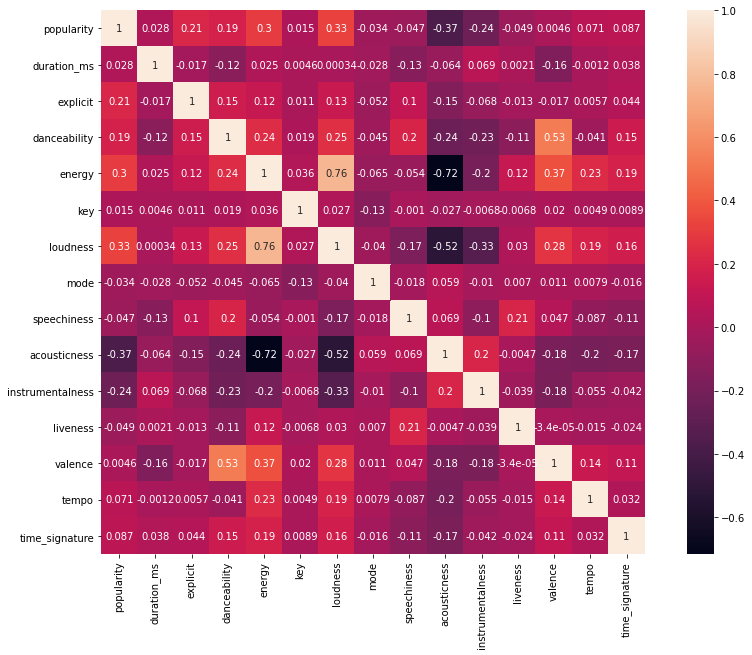

In [ ]:
plt.subplots(figsize=(15, 10))
sns.heatmap(muzify.corr(), annot=True, square=True)
plt.show()

In [ ]:
caya=muzify[muzify.name=='Come As You Are']
caya.head(3)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
64444,0MKGH8UMfCnq5w7nG06oM5,Come As You Are,79,218920,0,['Nirvana'],['6olE6TJLqED3rqDCT0FyPh'],1991-09-26,0.500,0.824,4,-5.846,0,0.0388,0.00016,0.00161,0.0916,0.539,120.125,4
64776,2RsAajgo0g7bMCHxwH3Sk0,Come As You Are,54,218920,0,['Nirvana'],['6olE6TJLqED3rqDCT0FyPh'],1991-09-26,0.500,0.824,4,-5.846,0,0.0388,0.00016,0.00161,0.0916,0.539,120.125,4
67523,3sYWyVGfPuit80szWXhrRA,Come As You Are,65,253907,0,['Nirvana'],['6olE6TJLqED3rqDCT0FyPh'],1994-11-01,0.683,0.766,5,-8.733,0,0.0410,0.55400,0.00346,0.0815,0.568,119.190,4


In [ ]:
# lets see if there is missing data

def display_missing(df):    
    for col in df.columns.tolist():   
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))   
    print('\n')
    
display_missing(muzify)

id column missing values: 0
name column missing values: 71
popularity column missing values: 0
duration_ms column missing values: 0
explicit column missing values: 0
artists column missing values: 0
id_artists column missing values: 0
release_date column missing values: 0
danceability column missing values: 0
energy column missing values: 0
key column missing values: 0
loudness column missing values: 0
mode column missing values: 0
speechiness column missing values: 0
acousticness column missing values: 0
instrumentalness column missing values: 0
liveness column missing values: 0
valence column missing values: 0
tempo column missing values: 0
time_signature column missing values: 0




In [ ]:
class SpotifyRecommender():
    def __init__(self, rec_data):
        #our class should understand which data to work with
        self.rec_data_ = rec_data
    
    #if we need to change data
    def change_data(self, rec_data):
        self.rec_data_ = rec_data
    
    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, amount=1):
        distances = []
    #choosing the data for our song
        song = self.rec_data_[(self.rec_data_.name.str.lower() == song_name.lower())].head(1).values[0]
    #dropping the data with our song
        res_data = self.rec_data_[self.rec_data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(res_data.values):
            dist = 0
            for col in np.arange(len(res_data.columns)):
    #indeces of non-numerical columns
                if not col in [1, 6, 12, 14, 18]:
    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        res_data['distance'] = distances
    #sorting our data to be ascending by 'distance' feature
        res_data = res_data.sort_values('distance')
        columns = ['artists', 'name']
        return res_data[columns][:amount]

In [ ]:
recommender = SpotifyRecommender(muzify)

In [ ]:
from tqdm import tqdm

In [ ]:
recommender = muzify_filtered

In [ ]:
muzify_filtered = ('Bohemian Rhapsody')

In [ ]:
muzify_filtered

'Bohemian Rhapsody'

In [ ]:
def normalize_column(col):
    max_d = data[col].max()
    min_d = data[col].min()
    data[col] = (data[col] - min_d)/(max_d - min_d)

In [ ]:
caya=muzify[muzify=='Come As You Are']
caya.head(3)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
muzify_.cat[:10]

NameError: ignored